<a href="https://colab.research.google.com/github/ThuyPh-am/ThuyPh-am/blob/main/Decision_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Topic: Apple Quality Classification Using Machine Learning

#### Problem Statement:
The goal of this project is to classify the quality of apples based on various features such as size, color, and texture. The dataset, provided by an American agriculture company, contains information about different attributes of apples along with their corresponding quality labels. The task is to build a machine learning model that can accurately classify the quality of apples as high, medium, or low based on the provided features.

#### List of Libraries Required:
- Pandas: For data manipulation and analysis.
- NumPy: For numerical operations.
- Matplotlib and Seaborn: For data visualization.
- Scikit-learn: For machine learning modeling and evaluation.
- Google Colab: For accessing the dataset stored in Google Drive.

#### Sources of Information:
- **Dataset Source**: The dataset used for this project was obtained from Kaggle (https://www.kaggle.com/datasets/nelgiriyewithana/apple-quality?resource=download) and was viewed on 18 February 2024.
- **Inspiration Sources**: The project was inspired by similar works on Kaggle, particularly the notebooks titled "Clustering KMeans with PCA" and "Apple Quality Classifier: RandomForest and SVM".

##### Introduction to Decision Trees:
Decision trees are supervised learning algorithms used for both classification and regression tasks. They work by recursively partitioning the feature space into subsets based on the value of the features, with the goal of minimizing impurity or maximizing information gain at each split.

#### Practical Exercise:
- Load the dataset into Google Colab from Google Drive.
- Perform data preprocessing steps such as handling missing values and encoding categorical variables.
- Split the dataset into features (attributes) and target labels (quality labels).
- Split the data into training and testing sets for model evaluation.
- Train a decision tree classifier on the training data.
- Evaluate the performance of the decision tree model using metrics such as accuracy, precision, recall, and F1-score.
- Visualize the decision tree to interpret the rules learned by the model.

#### Proposed Solution:
- Fine-tune the decision tree model by adjusting hyperparameters such as maximum depth, minimum samples per leaf, and criterion (gini impurity or information gain).
- Re-evaluate the performance of the optimized decision tree model on the testing set.
- Compare the performance of the decision tree model with other machine learning algorithms if applicable.
- Deploy the final decision tree model for predicting the quality of new apples.

#### Limitations and Conclusions:
- Limitations: Decision tree models may suffer from overfitting, especially when the tree depth is too large. They may also struggle with handling imbalanced data and noisy features.
- Conclusions: Despite limitations, decision tree classifiers offer a transparent and interpretable way to classify the quality of apples based on their characteristics. By understanding the rules learned by the model, agriculture companies can make informed decisions to optimize apple production and distribution processes.

This notebook focuses on solving the apple quality classification problem using decision tree classification techniques, providing insights into the factors influencing apple quality and aiding decision-making processes in the agriculture industry.


**Apple Quality classification**

This notebook is to solve the classification problem of apple.
The dataset was provided by an American agriculture company, published on Kaggle, https://www.kaggle.com/datasets/nelgiriyewithana/apple-quality?resource=download, viewed on 18 February 2024.

The dataset was stored in Google drive to mount in Google Colab.

The inspiration of this notebook are:
1. https://www.kaggle.com/code/dsptlp/clustering-kmeans-with-pca
2. https://www.kaggle.com/code/dedlinnn/apple-quality-classifier-randomforest-and-svm

Ashwin Raj 2021, 'An Exhaustive Guide to Decision Tree Classification in Python 3.x', [blog], viewed 18 February 2024, https://towardsdatascience.com/an-exhaustive-guide-to-classification-using-decision-trees-8d472e77223f

Anyi Guo 2021, 'Pearson vs. Spearman Correlation: What's the difference?', [blog], viewed 18 February 2024, https://anyi-guo.medium.com/correlation-pearson-vs-spearman-c15e581c12ce

Sklearn Documentation<br>
Pandas Documentation<br>
Seaborn Documentation

This notebook was designed to classify quality of apple from the mentioned dataset, using the Decision Tree <br>
This structure of this notebook contained these steps:


1.   Import dataset
2.   Explore dataset with the stastical information, investigate the correlation among features and between features and label
3.   Deploying Decision Tree to perform classification
4.   Optimise the structure of model by tweaking hyper parameters for an improved performance



The notebook was started by firstly mounting Google Drive to import the dataset from Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
%cd /content/gdrive/MyDrive/data mining/

/content/gdrive/MyDrive/data mining


In [ ]:
# !pip uninstall scikit-learn -y

# !pip install -U scikit-learn

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
import polars as pl

The features were Size, Weight, Sweetness, Crunchiness, Juiciness, Ripeness, and Acidity. Additionally, the column A_id did not have any impact on classification, but rather to cause noise for the training set. <br>
The label was quality, meaning the quality of the item. The quality was still a str "good" and "bad"





In [ ]:
df =pd.read_csv("apple_quality.csv")
df.head()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good


The feature 'A_id' does not reflect any impact in the classification, it is just the number of odering of the data item so this column needs to be reduced

In [ ]:
df.columns

Index(['A_id', 'Size', 'Weight', 'Sweetness', 'Crunchiness', 'Juiciness',
       'Ripeness', 'Acidity', 'Quality'],
      dtype='object')

In [ ]:
df

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good
...,...,...,...,...,...,...,...,...,...
3996,3996.0,-0.293118,1.949253,-0.204020,-0.640196,0.024523,-1.087900,1.854235285,good
3997,3997.0,-2.634515,-2.138247,-2.440461,0.657223,2.199709,4.763859,-1.334611391,bad
3998,3998.0,-4.008004,-1.779337,2.366397,-0.200329,2.161435,0.214488,-2.229719806,good
3999,3999.0,0.278540,-1.715505,0.121217,-1.154075,1.266677,-0.776571,1.599796456,good


There are 4000 entries, the last entry contains no information so it is deleted

In [ ]:
df = df.drop([4000])
df

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good
...,...,...,...,...,...,...,...,...,...
3995,3995.0,0.059386,-1.067408,-3.714549,0.473052,1.697986,2.244055,0.137784369,bad
3996,3996.0,-0.293118,1.949253,-0.204020,-0.640196,0.024523,-1.087900,1.854235285,good
3997,3997.0,-2.634515,-2.138247,-2.440461,0.657223,2.199709,4.763859,-1.334611391,bad
3998,3998.0,-4.008004,-1.779337,2.366397,-0.200329,2.161435,0.214488,-2.229719806,good


In [ ]:
df = df.drop(columns = ['A_id'])

In [ ]:
df.head(20)

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good
5,-3.425400,-1.409082,-1.913511,-0.555775,-3.853071,1.914616,-2.981523169,bad
6,1.331606,1.635956,0.875974,-1.677798,3.106344,-1.847417,2.414170509,good
7,-1.995462,-0.428958,1.530644,-0.742972,0.158834,0.974438,-1.470125066,good
8,-3.867632,-3.734514,0.986429,-1.207655,2.292873,4.080921,-4.871904758,bad
9,-0.727983,-0.442820,-4.092223,0.597513,0.393714,1.620857,2.185607723,bad


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Size         4000 non-null   float64
 1   Weight       4000 non-null   float64
 2   Sweetness    4000 non-null   float64
 3   Crunchiness  4000 non-null   float64
 4   Juiciness    4000 non-null   float64
 5   Ripeness     4000 non-null   float64
 6   Acidity      4000 non-null   object 
 7   Quality      4000 non-null   object 
dtypes: float64(6), object(2)
memory usage: 250.1+ KB


In [ ]:
df.describe()

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,-0.503015,-0.989547,-0.470479,0.985478,0.512118,0.498277
std,1.928059,1.602507,1.943441,1.402757,1.930286,1.874427
min,-7.151703,-7.149848,-6.894485,-6.055058,-5.961897,-5.864599
25%,-1.816765,-2.011770,-1.738425,0.062764,-0.801286,-0.771677
50%,-0.513703,-0.984736,-0.504758,0.998249,0.534219,0.503445
75%,0.805526,0.030976,0.801922,1.894234,1.835976,1.766212
max,6.406367,5.790714,6.374916,7.619852,7.364403,7.237837


The feature in this dataset were in different range. Checking if there is any duplication and N.A values in the dataset

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.isna().sum()

Size           0
Weight         0
Sweetness      0
Crunchiness    0
Juiciness      0
Ripeness       0
Acidity        0
Quality        0
dtype: int64

The feature 'Acidity' is the string type. It might correlated to the classification so it'd better to convert to float type to measure correlation to the classification.




Counting values of label to check the imbalance of the datasset

In [ ]:
df.Quality.value_counts()

1    2004
0    1996
Name: Quality, dtype: int64

In [ ]:
df['Acidity'] = df['Acidity'].astype('float')
df.head(20)

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590,good
1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809,good
2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636,bad
3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723,good
4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984,good
5,-3.425400,-1.409082,-1.913511,-0.555775,-3.853071,1.914616,-2.981523,bad
6,1.331606,1.635956,0.875974,-1.677798,3.106344,-1.847417,2.414171,good
7,-1.995462,-0.428958,1.530644,-0.742972,0.158834,0.974438,-1.470125,good
8,-3.867632,-3.734514,0.986429,-1.207655,2.292873,4.080921,-4.871905,bad
9,-0.727983,-0.442820,-4.092223,0.597513,0.393714,1.620857,2.185608,bad


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Size         4000 non-null   float64
 1   Weight       4000 non-null   float64
 2   Sweetness    4000 non-null   float64
 3   Crunchiness  4000 non-null   float64
 4   Juiciness    4000 non-null   float64
 5   Ripeness     4000 non-null   float64
 6   Acidity      4000 non-null   float64
 7   Quality      4000 non-null   object 
dtypes: float64(7), object(1)
memory usage: 250.1+ KB


Transform the label of apple quality from 'good' and 'bad' to binary categories

In [ ]:
le = LabelEncoder()
df['Quality']= le.fit_transform(df['Quality'])

Inverse transform to see what 'bad' and 'good' are encoded as.

'bad' is encoded as 0
'good' is encoded as 1

In [ ]:
list(le.inverse_transform([0,1]))

['bad', 'good']

In [ ]:
df.head()

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590,1
1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809,1
2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636,0
3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723,1
4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Size         4000 non-null   float64
 1   Weight       4000 non-null   float64
 2   Sweetness    4000 non-null   float64
 3   Crunchiness  4000 non-null   float64
 4   Juiciness    4000 non-null   float64
 5   Ripeness     4000 non-null   float64
 6   Acidity      4000 non-null   float64
 7   Quality      4000 non-null   int64  
dtypes: float64(7), int64(1)
memory usage: 250.1 KB


In [ ]:
Corr = df.corr()

In [ ]:
Corr

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
Size,1.000000,-0.170702,-0.324680,0.169868,-0.018892,-0.134773,0.196218,0.244007
Weight,-0.170702,1.000000,-0.154246,-0.095882,-0.092263,-0.243824,0.016414,0.001421
Sweetness,-0.324680,-0.154246,1.000000,-0.037552,0.095882,-0.273800,0.085999,0.250998
Crunchiness,0.169868,-0.095882,-0.037552,1.000000,-0.259607,-0.201982,0.069943,-0.012376
Juiciness,-0.018892,-0.092263,0.095882,-0.259607,1.000000,-0.097144,0.248714,0.260223
Ripeness,-0.134773,-0.243824,-0.273800,-0.201982,-0.097144,1.000000,-0.202669,-0.264315
Acidity,0.196218,0.016414,0.085999,0.069943,0.248714,-0.202669,1.000000,-0.007697
Quality,0.244007,0.001421,0.250998,-0.012376,0.260223,-0.264315,-0.007697,1.000000


<Axes: >

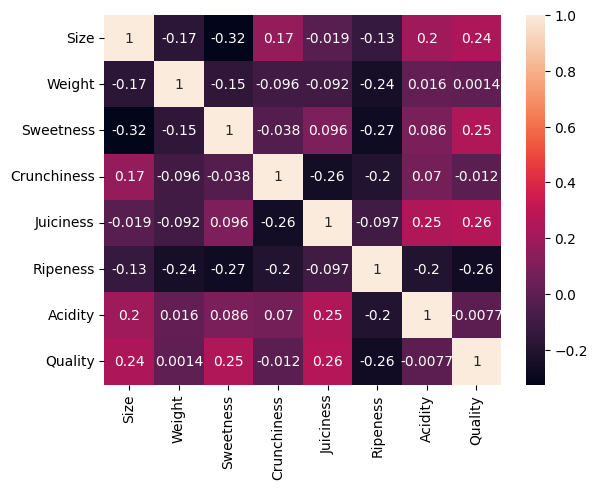

In [ ]:
sns.heatmap(Corr, annot = True)

In [ ]:
Spearman_corr = df.corr(method='spearman')

In [ ]:
Spearman_corr

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
Size,1.000000,-0.144268,-0.310476,0.171818,-0.031881,-0.154780,0.209998,0.245288
Weight,-0.144268,1.000000,-0.119883,-0.087117,-0.090611,-0.244340,0.030479,0.001721
Sweetness,-0.310476,-0.119883,1.000000,-0.017346,0.097540,-0.254604,0.072026,0.237223
Crunchiness,0.171818,-0.087117,-0.017346,1.000000,-0.236538,-0.183677,0.073556,0.000293
Juiciness,-0.031881,-0.090611,0.097540,-0.236538,1.000000,-0.124169,0.230778,0.258097
Ripeness,-0.154780,-0.244340,-0.254604,-0.183677,-0.124169,1.000000,-0.194695,-0.260126
Acidity,0.209998,0.030479,0.072026,0.073556,0.230778,-0.194695,1.000000,0.004068
Quality,0.245288,0.001721,0.237223,0.000293,0.258097,-0.260126,0.004068,1.000000


<Axes: >

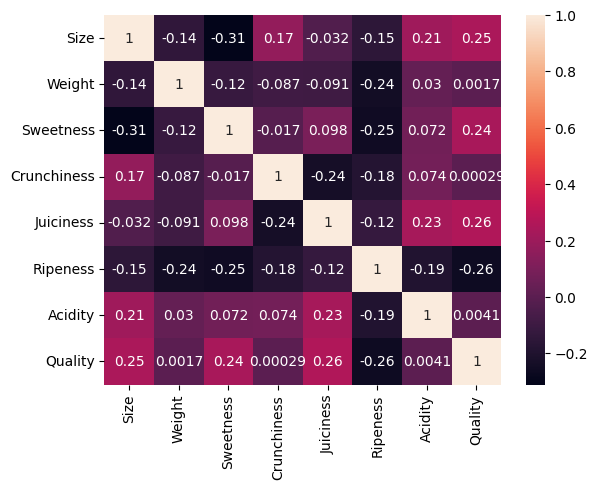

In [ ]:
sns.heatmap(Spearman_corr,annot=True)

According to the correlation results, the features were nearly incorrelated. The feature "Size" had the highest correlation relationship with label "Quality" but it was still weakly correlation.

The next step was to split dataset into train set and test set, using the ration 30%, so 30% of the dataset were reserved for testing, the dataset was also shuffled to ensure the random quality of the dataset.

In [ ]:
 Y = df.Quality
 X = df.drop('Quality', axis = 1)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split (X, Y, test_size = 0.3, random_state = 42)

Standard Scaler was implied to normalise the dataset to transform all features into the similar range.

In [ ]:
Std = StandardScaler()
Std.fit(x_train)

StandardScaler()

In [ ]:
Std.mean_

array([-0.50143666, -0.97636951, -0.46059802,  0.97894867,  0.52641029,
        0.48341482,  0.09776827])

In [ ]:
x_test

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity
555,3.099411,-1.691561,-3.679364,0.963606,0.538102,1.660099,-0.544761
3491,1.439788,-0.223976,-0.061449,1.412705,0.885641,-2.191811,1.952777
527,1.206786,-0.508979,1.736207,1.301011,-0.556149,-1.332052,1.009156
3925,-1.612077,-1.554690,2.250267,-0.155060,-1.435862,2.388755,-0.487297
2989,-1.962900,-0.506961,-2.388917,0.136195,-2.780126,1.623751,-1.636459
...,...,...,...,...,...,...,...
3856,-0.983041,0.513265,-0.149099,1.780467,2.010521,-0.461654,-1.003866
226,0.585208,-1.480399,-1.530432,1.592532,0.221291,-0.046626,1.508887
1612,0.401202,0.211018,0.504864,-1.362692,-1.165679,-0.273592,1.283615
535,-1.572828,-0.816051,-0.165679,0.792687,0.358000,1.662179,-2.748017


In [ ]:
y_test

555     1
3491    0
527     0
3925    1
2989    0
       ..
3856    1
226     0
1612    1
535     1
3848    1
Name: Quality, Length: 1200, dtype: int64

In [ ]:
x_train = Std.transform(x_train)

In [ ]:
x_train

array([[ 1.07863273, -1.26843041, -0.34112764, ...,  1.31937178,
        -0.45902486,  0.76425733],
       [ 1.65314822,  1.17152733, -0.28841676, ..., -0.42543601,
        -1.63134454,  0.25312639],
       [-0.31336649,  0.58327241,  0.6748614 , ...,  1.06187544,
        -0.57032247, -1.84765139],
       ...,
       [ 1.53984681, -0.43545914,  0.0975298 , ..., -0.97269115,
         2.13730426,  0.52915652],
       [-0.61233551, -0.12399771,  1.06039568, ..., -0.08640162,
         0.00635102, -0.4040597 ],
       [-0.63309612,  1.42871138,  0.37800981, ...,  0.58989034,
        -0.94816525, -0.73895328]])

In [ ]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(x_train, y_train)

[Text(0.4821697634424436, 0.975, 'x[4] <= -0.483\ngini = 0.5\nsamples = 2800\nvalue = [1403, 1397]'),
 Text(0.22730141366543252, 0.925, 'x[1] <= 1.011\ngini = 0.433\nsamples = 863\nvalue = [589, 274]'),
 Text(0.12104510265903737, 0.875, 'x[0] <= 0.041\ngini = 0.387\nsamples = 721\nvalue = [532, 189]'),
 Text(0.040895321440592394, 0.825, 'x[5] <= -0.83\ngini = 0.223\nsamples = 344\nvalue = [300, 44]'),
 Text(0.02019522046449007, 0.775, 'x[2] <= 0.363\ngini = 0.472\nsamples = 42\nvalue = [26, 16]'),
 Text(0.010770784247728038, 0.725, 'x[4] <= -1.243\ngini = 0.444\nsamples = 21\nvalue = [7, 14]'),
 Text(0.005385392123864019, 0.675, 'x[1] <= 0.679\ngini = 0.32\nsamples = 5\nvalue = [4, 1]'),
 Text(0.0026926960619320095, 0.625, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(0.008078088185796028, 0.625, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.016156176371592057, 0.675, 'x[4] <= -0.536\ngini = 0.305\nsamples = 16\nvalue = [3, 13]'),
 Text(0.013463480309660047, 0.625, 'x[6] <= -

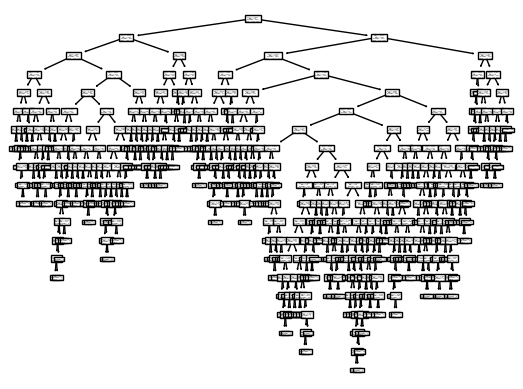

In [ ]:
tree.plot_tree(clf)

In [ ]:
X.columns

Index(['Size', 'Weight', 'Sweetness', 'Crunchiness', 'Juiciness', 'Ripeness',
       'Acidity'],
      dtype='object')

In [ ]:
from sklearn.tree import export_text
result = export_text (clf, feature_names = ['Size','Weight','Sweetness','Crunchiness','Juiciness','Ripeness','Acidity'], class_names=['bad','good'])

In [ ]:
print(result)

|--- Juiciness <= -0.48
|   |--- Weight <= 1.01
|   |   |--- Size <= 0.04
|   |   |   |--- Ripeness <= -0.83
|   |   |   |   |--- Sweetness <= 0.36
|   |   |   |   |   |--- Juiciness <= -1.24
|   |   |   |   |   |   |--- Weight <= 0.68
|   |   |   |   |   |   |   |--- class: bad
|   |   |   |   |   |   |--- Weight >  0.68
|   |   |   |   |   |   |   |--- class: good
|   |   |   |   |   |--- Juiciness >  -1.24
|   |   |   |   |   |   |--- Juiciness <= -0.54
|   |   |   |   |   |   |   |--- Acidity <= -1.82
|   |   |   |   |   |   |   |   |--- class: bad
|   |   |   |   |   |   |   |--- Acidity >  -1.82
|   |   |   |   |   |   |   |   |--- Sweetness <= 0.07
|   |   |   |   |   |   |   |   |   |--- class: good
|   |   |   |   |   |   |   |   |--- Sweetness >  0.07
|   |   |   |   |   |   |   |   |   |--- Acidity <= -0.56
|   |   |   |   |   |   |   |   |   |   |--- class: bad
|   |   |   |   |   |   |   |   |   |--- Acidity >  -0.56
|   |   |   |   |   |   |   |   |   |   |--- class: good

In [ ]:
y_pred = clf.predict(x_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


In [ ]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",accuracy_score(y_test, y_pred))


Accuracy: 0.755


In [ ]:
clf_entropy = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth = 5)
clf_entropy = clf_entropy.fit(x_train, y_train)

In [ ]:
y_pred_entropy = clf_entropy.predict(x_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


In [ ]:
print("Accuracy:",accuracy_score(y_test, y_pred_entropy))

Accuracy: 0.77


In [ ]:
print("Precision:",precision_score(y_test, y_pred_entropy))
print("Recall:",recall_score(y_test, y_pred_entropy))
print("f1-score:",f1_score(y_test, y_pred_entropy))

Precision: 0.7451851851851852
Recall: 0.828665568369028
f1-score: 0.7847113884555382


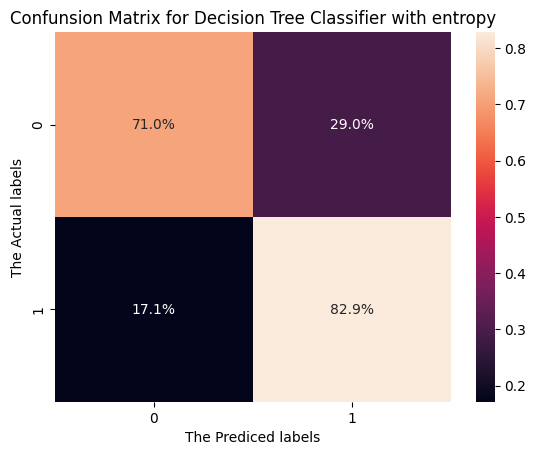

In [ ]:
cm = confusion_matrix(y_test, y_pred_entropy, normalize = 'true')
plt.title('Confunsion Matrix for Decision Tree Classifier with entropy')
cm_plt= sns.heatmap(cm, annot = True, fmt ='.1%')
plt.ylabel ('The Actual labels')
plt.xlabel('The Prediced labels')
plt.show()

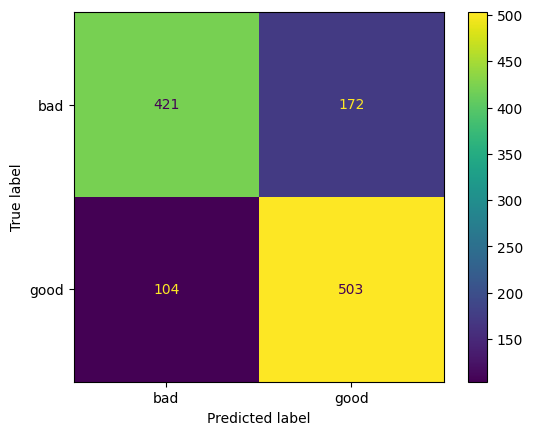

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
labels = ['bad','good']
cm = confusion_matrix(y_test, y_pred_entropy, labels = [0,1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=labels)
disp.plot()
plt.show()

The average accuracy score is 0.77. According to the confusion matrix, it showed that the model classified good apple more accurately than bad apple. It could be explained by the differences between the instances of good apple and bad apple in the dataset. There was more instances labelled good than bad. Compared with previous models on the dataset, the accuracy 77% using Decision Tree was rather positive.